# Classification general framework:
1. Understanding the problem.
2. Preporcessing the data.
   - Categorical to numerical representation.
   - Scaling.
3. Splitting the data (train and test set)
4. fitting the model
5. Generating Predictions.
6. Evaluating the model

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("./Resources/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


<Axes: xlabel='derogatory_marks'>

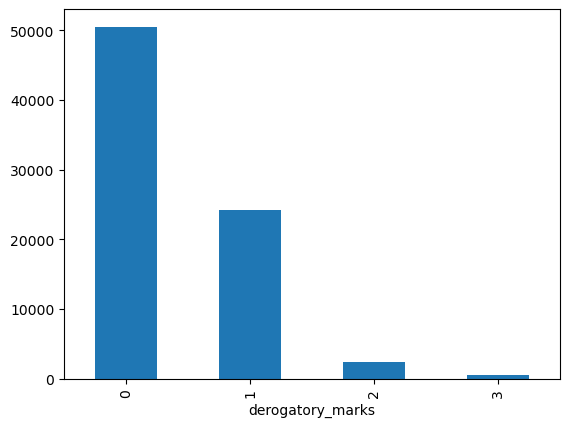

In [3]:
df.derogatory_marks.value_counts().plot(kind="bar")

<Axes: xlabel='loan_status'>

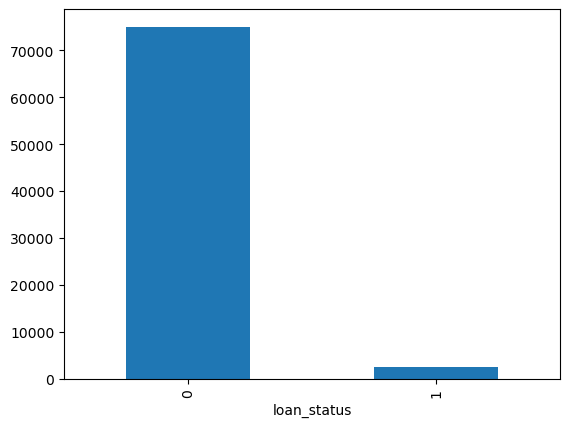

In [4]:
df.loan_status.value_counts().plot(kind="bar")

## Imbalanced Dataset
### Solutions:
1. OverSampling (1s)
2. Undersampling (0s) --> (we cant do this in case of limited data)
3. SMOTE
4. SMOTEEN

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [5]:
# Separate the data into labels and features

# Separate the y variable, the labels
X = df.iloc[:,:-1]

# Separate the X variable, the features
y = df.iloc[:,-1]

In [7]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [8]:
# Review the X variable DataFrame
X.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [9]:
int(len(df) * 0.7)

54275

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [10]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
xtrain,xtest,ytrain,ytest = train_test_split(X,y, shuffle=True, stratify=y, test_size=0.3, random_state=1)

1. Suffle =True (Cannot not be done with time series data/ or where sequences is important.)
2. Stritify = y (Equal representation of y in % tersm in x and y train, tests data-structures.)

In [11]:
xtrain.shape, ytrain.shape

((54275, 7), (54275,))

In [12]:
ytrain.value_counts()[1] / y.value_counts()[1]

0.7

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression()

# Fit the model using training data
lr.fit(xtrain,ytrain)

LogisticRegression()

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [14]:
# Make a prediction using the testing data
predictions = lr.predict(xtest)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [15]:
# Generate a confusion matrix for the model
confusion_matrix(ytest, predictions)

array([[22409,   102],
       [   66,   684]])

Precision: $$ True Positives / True Positives + False Positives$$
Recall: $$ True Positives / True Positives + False Negative $$

Precsion: True Positives / Actual Results (Out of all the theives caught by the model, how many were actual theives and how many were inncocent).  
Recall: True Positives / Predicted Results ( Out of all the theives, how many got away from the model.)

In [16]:
# Print the classification report for the model
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.91      0.89       750

    accuracy                           0.99     23261
   macro avg       0.93      0.95      0.94     23261
weighted avg       0.99      0.99      0.99     23261



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Overall, this model operates with a superb level of success. Class 0 (healthy loan) has perfect scores across the board for precision, recall, & f1-score. Class 1 (high risk loan) performs at a slightly lower rate, but still strong (precision:0.87, recall:0.91, & f1:0.89). Both classes presenting with such high scores, puts the accuracy and weighted avg at 0.99.

---